In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.8 MB/s 
     |████████████████████████████████| 88 kB 5.1 MB/s 
     |████████████████████████████████| 5.2 MB 65.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 6.3 MB/s 
     |████████████████████████████████| 4.4 MB 48.3 MB/s 
     |████████████████████████████████| 1.2 MB 16.9 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
     |████████████████████████████████| 636 kB 63.4 MB/s 
     |████████████████████████████████| 6.6 MB 23.4 MB/s 
     |████████████████████████████████| 1.1 MB 58.7 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342063 sha256=1963aecbb6fb2919ff429265d41735b4846764337d293ed7c6efdd5cf0fc0fb9
  Stored in directory: /root/.cache

In [3]:
!pip install pyvis
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=0f2ed8e6710da827b639730c05a6fad9be241e51319e10f4539e770a2a3da7ce
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
     |████████████████████████████████| 776.7 MB 4.5 kB/s 
     |████████████████████████████████| 448 kB 61.5 MB/s 
     |████████████████████████████████| 1.1 MB 58.6 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 19.7 MB 10.1 MB/s 
     |████████████████████████████████| 981 kB 52.5 MB/s 
     |████████████████████████████████| 788 kB 52.5 MB/s 
   

In [5]:
import pandas as pd
import spacy
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from bertopic import BERTopic
from IPython.core.pylabtools import figsize
from pyvis.network import Network
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.dataset.dataset import Dataset


In [6]:
def removing_na(df, COLUMN):
  # remove the rows with NA
  df = df.loc[(df[COLUMN].isna() == False)]
  return df

In [7]:
def preprocessing(df, COLUMN):
  # pre processing
  nlp = spacy.load("en_core_web_sm")
  texts = df[COLUMN]

  processed_texts = [text for text in tqdm(nlp.pipe(texts, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(texts))]
  # lemmatizing, removing stop words and panctuation, lowercasing and taking nouns and adjectives
  lemmatized_texts = [[token.lemma_.lower() for token in doc if 
                    not token.is_punct and not token.is_stop and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')] for doc in processed_texts]
  # remove numbers
  lemmatized_texts = [[re.sub(r'^[0-9]+|^.$', '', word) for word in text] for text in lemmatized_texts]
  # remove empty values
  lemmatized_texts = [[token for token in text if token != ''] for text in lemmatized_texts]
  return lemmatized_texts

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/emotion_regulation.csv')

In [9]:
df_keywords  = removing_na(df, COLUMN = 'keywords')
df_abstracts  = removing_na(df, COLUMN = 'abstract')

In [10]:
list_keywords = df_keywords['keywords'].to_list()
list_abstracts = df_abstracts['abstract'].to_list()

In [11]:
lemmatized_keywords = preprocessing(df_keywords, COLUMN = 'keywords')
lemmatized_abstracts = preprocessing(df_abstracts, COLUMN = 'abstract')

  0%|          | 0/5031 [00:00<?, ?it/s]

  0%|          | 0/6098 [00:00<?, ?it/s]

In [12]:
allkeywords = []

for wordlist in lemmatized_keywords:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allkeywords.append(string)


In [13]:
allabstracts = []

for wordlist in lemmatized_abstracts:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allabstracts.append(string)


# **KEYWORDS**

In [165]:
model_keywords = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2", min_topic_size = 15)


In [166]:
topics_keywords, probabilities = model_keywords.fit_transform(allkeywords)

In [167]:
freq_keywords = model_keywords.get_topic_info()
print("Number of topics: {}".format( len(freq_keywords)))
freq_keywords

Number of topics: 96


,Topic,Count,Name
0,-1,696,-1_conflict_generalized_interaction_mood
1,0,304,0_state_universal_actigraphy_virtue
2,1,166,1_emotional_emotion_parental_problems
3,2,161,2_mental_health_service_care
4,3,157,3_trauma_stress_ptsd_posttraumatic
...,...,...,...
91,90,18,90_cyberbullying_cybervictimization_cyber_dacc
92,91,17,91_gaming_internet_addiction_actual
93,92,17,92_oncology_cancer_tumor_survivors
94,93,17,93_event_life_potential_beta


In [168]:
model_keywords.visualize_topics()

In [169]:
model_keywords.visualize_barchart()

# KEYWORDS COHERENCE AND DIVERSITY





In [170]:
dataset_keywords = Dataset()
dataset_keywords.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/keywords")

In [171]:
all_words = [word for words in dataset_keywords.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0].upper() if vals[0].upper() in all_words else all_words[0]
        for vals in model_keywords.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_keywords)) - 1)
]

output_keywords = {"topics": bertopic_topics}


In [172]:
npmi_keywords = Coherence(texts=dataset_keywords.get_corpus(), topk=10, measure="c_v")
topic_diversity_keywords= TopicDiversity(topk=10)

In [173]:
npmi_keywords.score(output_keywords)


0.37187456747136416

In [174]:
topic_diversity_keywords.score(output_keywords)

0.5831578947368421

# **ABSTRACTS**

In [140]:
model_abstracts = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2", n_gram_range =(1,2), min_topic_size = 15)
topics_abstracts, probabilities = model_abstracts.fit_transform(allabstracts)

In [141]:
freq_abs = model_abstracts.get_topic_info()
print("Number of topics: {}".format( len(freq_abs)))
freq_abs

Number of topics: 54


,Topic,Count,Name
0,-1,2541,-1_adolescent_study_problems_emotional
1,0,405,0_emotion_regulation_emotion regulation_strategy
2,1,325,1_problems_behavior_teacher_year
3,2,181,2_mental_health_mental health_health problems
4,3,135,3_autism_autism disorder_disorder_autism spectrum
5,4,133,4_trauma_ptsd_symptoms_exposure
6,5,131,5_eating_weight_obesity_food
7,6,129,6_suicidal_ideation_suicidal self_self
8,7,125,7_emotion_regulation_emotion regulation_mother
9,8,122,8_stress_cortisol_stressors_reactivity


In [142]:
model_abstracts.visualize_topics()

In [143]:
model_abstracts.visualize_barchart()

# ABSTRACTS COHERENCE AND DIVERSITY


In [144]:
dataset_abstracts = Dataset()
dataset_abstracts.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/abstracts")

In [145]:
all_words = [word for words in dataset_abstracts.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0].upper() if vals[0].upper() in all_words else all_words[0]
        for vals in model_abstracts.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_abstracts)) - 1)
]

output_abstracts = {"topics": bertopic_topics}


In [146]:
npmi_abs = Coherence(texts=dataset_abstracts.get_corpus(), topk=10, measure="c_v")
topic_diversity_abs = TopicDiversity(topk=10)

In [147]:
npmi_abs.score(output_abstracts)

0.4192447651771397

In [148]:
topic_diversity_abs.score(output_abstracts)

0.45660377358490567

# NETWORK

In [131]:
# create df with nodes and edges
def generate_edges(topic2words):
  word2topics = {}
  for key ,values in topic2words.items():
    for value in values:
      if value in word2topics:
        word2topics[value].append(key)
      else:
        word2topics[value] = [key]

  source = []
  target = []
  for topic, words in topic2words.items():
    for word in words:
      for top in word2topics[word]:
        if top != topic:
          source.append(f"{words[0]}\n{words[1]}")
          target_words = topic2words[top]
          target.append(f"{target_words[0]}\n{target_words[1]}")


  df = pd.DataFrame()
  df['source'] = source
  df['target'] = target
  df['weight'] = 1

  return df

In [132]:
def create_dict_top2word(model):  
  topic2words = {}
  for topic in  model.get_topics():
    if topic not in [0, -1]:
      topic2words[topic] = [word[0] for word in model.get_topics()[topic]]
  return topic2words

In [133]:
def df2network(edges_df):
  network = nx.from_pandas_edgelist(edges_df, source = 'source', target = 'target', edge_attr = 'weight',create_using=nx.MultiGraph())
  return network


## KEYWORDS NETWORK

In [175]:
keywords_edges = generate_edges(create_dict_top2word(model_keywords))
keywords_edges.to_csv("BERT_keywords_emotion_network.csv")

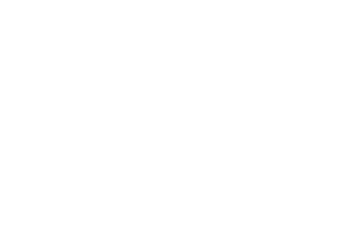

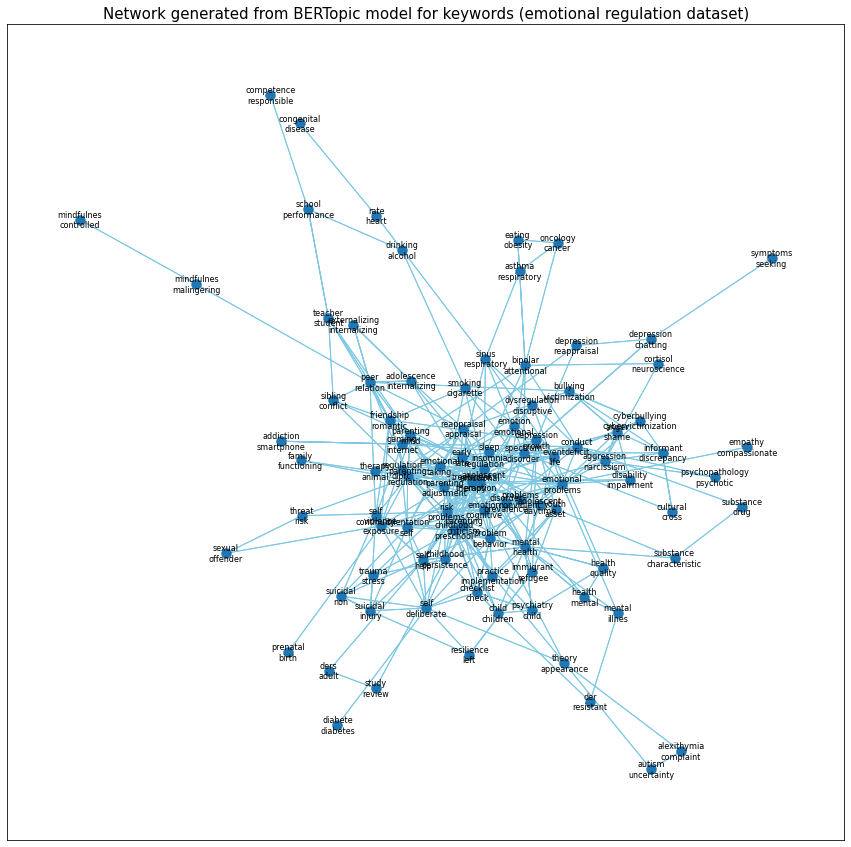

In [176]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for keywords (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(keywords_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [177]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(keywords_edges))

net.show("BERT_net_keywords_emotions.html")

## ABSTARCTS NETWORK


In [178]:
abstracts_edges = generate_edges(create_dict_top2word(model_abstracts))
abstracts_edges.to_csv("BERT_abstracts_emotion_network_df.csv")

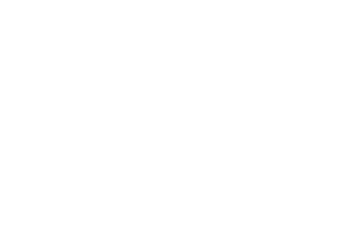

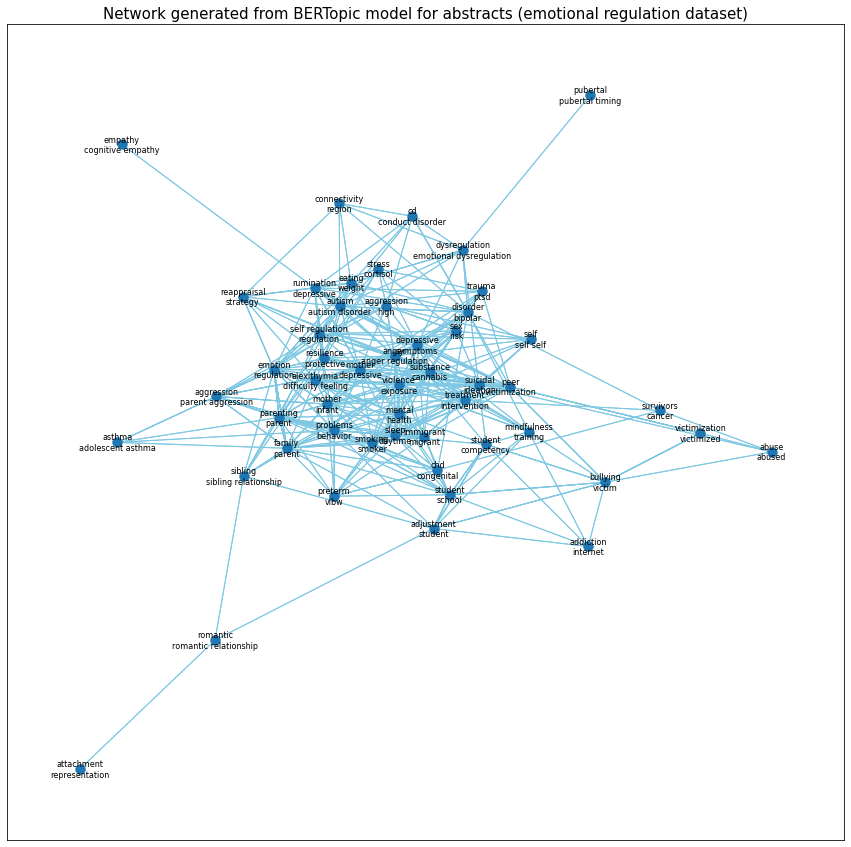

In [179]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for abstracts (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(abstracts_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [180]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(abstracts_edges))

net.show("BERT_net_abstracts_emotions_regulation.html")